In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os 
import pickle
from typing import Tuple, Optional
from transformers import pipeline 
import tqdm
import torch 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cpu')

In [ ]:
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data() 

In [1]:
plt.imshow(x_train[0])

NameError: name 'plt' is not defined

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

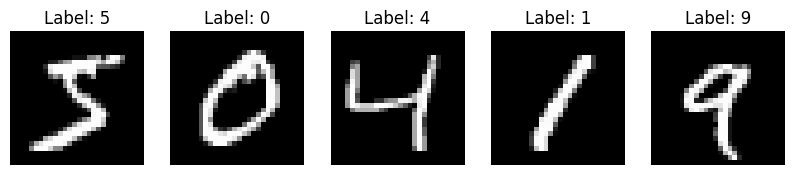

In [11]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5 , i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis("OFF")
    
plt.show()

In [13]:
model = models.Sequential([
    # layer One
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    #layer two
    layers.Conv2D(62, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    
    
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 62)        17918     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 62)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1550)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [15]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

In [37]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

2025-06-29 11:03:21.283726: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.4627 - loss: 1.5511

2025-06-29 11:06:06.096582: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 168s 213ms/step - accuracy: 0.4630 - loss: 1.5503 - val_accuracy: 0.8887 - val_loss: 0.3686
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 193s 257ms/step - accuracy: 0.8887 - loss: 0.3659 - val_accuracy: 0.9290 - val_loss: 0.2423
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 267ms/step - accuracy: 0.9277 - loss: 0.2376 - val_accuracy: 0.9539 - val_loss: 0.1617
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 198s 264ms/step - accuracy: 0.9501 - loss: 0.1646 - val_accuracy: 0.9625 - val_loss: 0.1336
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 177s 232ms/step - accuracy: 0.9614 - loss: 0.1261 - val_accuracy: 0.9692 - val_loss: 0.1054


In [38]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.8584 - loss: 76.2113


In [40]:
print(f'This is about the accuracy in this data set: {test_accuracy:.4f}')

This is about the accuracy in this data set: 0.8669


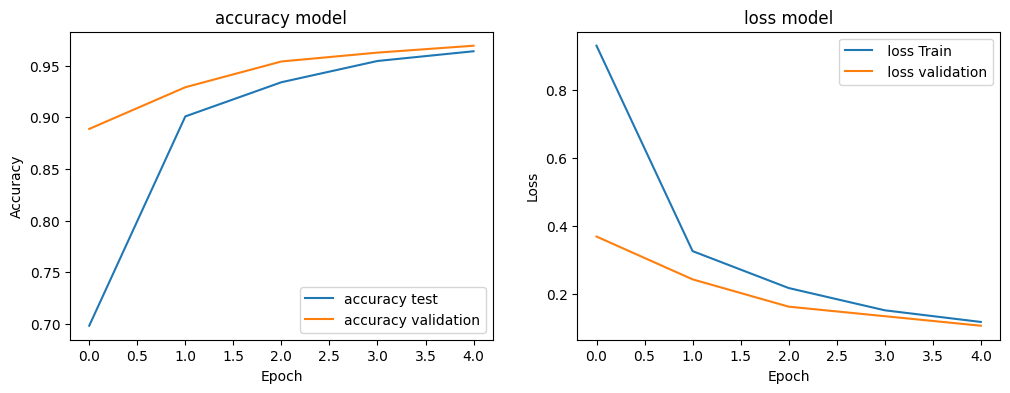

In [41]:
plt.figure(figsize=(12, 4))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy test')
plt.plot(history.history['val_accuracy'], label='accuracy validation')
plt.title('accuracy model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label=' loss Train')
plt.plot(history.history['val_loss'], label=' loss validation')
plt.title('loss model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


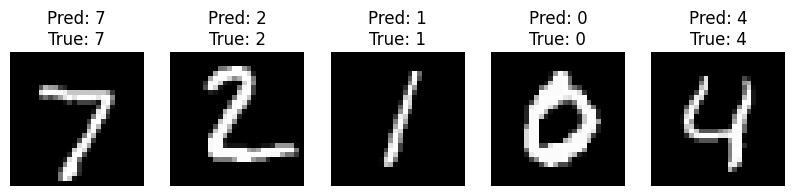

In [42]:
predictions = model.predict(x_test[:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()

# CIFAR-10

In [16]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
        return dic
    
    
file_data = '../../data/cifar-10-batches-py'



x_train = []
y_train = []
for i in range(1, 6):
    
    batch = unpickle(os.path.join(file_data, f'data_batch_{i}'))
    x_train.append(batch[b'data'])
    y_train.append(batch[b'labels'])
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

In [17]:
test_bach = unpickle(os.path.join(file_data, 'test_batch'))


In [18]:
x_test = test_bach[b'data']
y_test = np.array(test_bach[b'labels'])

In [19]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [20]:
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
x_test = x_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [21]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [22]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']



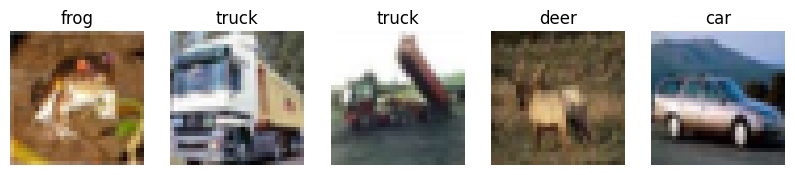

In [25]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
    
plt.show()
    

In [26]:
class Conv2D:
    def __init__(self, filters: int, kernel_size: Tuple[int, int], activation: str = "relu", padding: str = 'same'):
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = activation
        self.padding = padding
        self.weights = None
        self.bias = None
        
        
    def initialize_weights(self, input_shape: Tuple[int, int, int]):	
        fan_in = np.prod(self.kernel_size) * input_shape[2]
        fan_out = np.prod(self.kernel_size) * self.filters
        limit = np.sqrt(6 / (fan_in + fan_out))
        self.weights = np.random.uniform(-limit, limit, (self.kernel_size[0], self.kernel_size[1], input_shape[2], self.filters))
        self.bias = np.zeros((self.filters))
        
        
    def forward(self, x: np.ndarray)-> np.ndarray:
        
        batch_size, height, width, channels = x.shape 
        
        if self.weights is None:
            self.initialize_weights((height, width, channels))
            
            
        if self.padding == 'same':
            pad_h = self.kernel_size[0] // 2
            pad_w = self.kernel_size[1] // 2
            x_padded = np.pad(x, ((0,0), (pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant')
        else:
            x_padded = x      
        
        
        out_height = x_padded.shaep[1] - self.kernel_size[0] + 1
        
        out_weight = x_padded.shaep[2] - self.kernel_size[1] + 1
        
        output = np.zeros((batch_size, out_height, out_weight, self.filters))
        
        
        
        for i in range(out_height):
            for j in range(out_weight):
                for f in range(self.filters):
                    region = x_padded[:, i:i+self.kernel_size[0],j:j+self.kernel_size[1], :]
                    output[:, i, j, f] = np.sum(region * self.weights[:, :, :, f], axis=(1, 2, 3)) + self.bias[f]
                    
                    
        if self.activation == 'relu':
            output = np.maximum(0, output)
            
        return output
            
class BatchNormalization:
    
    def __init__(self, epsilon: float = 1e-5, momentum: float = 0.99):
        self.epsilon = epsilon
        self.momentum = momentum
        self.gamma = None
        self.beta = None
        self.running_mean = None
        self.running_var = None
        self.training = True
    
    def forward(self, x: np.ndarray)-> np.ndarray:
        if self.gamma is None:
            shape = x.shape[-1 :]
    
            self.gamma = np.ones(shape)
            self.beta = np.zeros(shape)
    
            self.running_mean = np.zeros(shape)
            self.running_var = np.ones(shape)
            
            
        if self.training:
            
            batch_mean = np.mean(x, axis=(0, 1, 2), keepdims=True)
            batch_var = np.var(x, axis=(0, 1 ,2), keepdims=True)
            
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * batch_mean.squeeze()
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * batch_var.squeeze()
            
            
            # Normalize
            
            x_norm = (x - batch_mean) / np.sqrt(batch_var + self.epsilon)
            
        else:
            x_norm = (x - self.running_mean) / np.sqrt(self.running_var + self.epsilon) 
            
        return self.gamma * x_norm + self.beta
    
    
    
class MaxPooling2D:
    def __init__(self, pool_size: Tuple[int, int] = (2, 2)):
        self.pool_size = pool_size
        
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        batch_size, height, width, channels = x.shape
        
        
        
        out_height = height // self.pool_size[0]
        out_width = width // self.pool_size[1]
        
        
        
        
        output = np.zeros((batch_size, out_height, out_width, channels ))
        
        for i in range(out_height):
            for j in range(out_width):
                h_start = i * self.pool_size[0] 
                h_end = h_start + self.pool_size[0]
                w_start = j * self.pool_size[1]
                w_end = w_start + self.pool_size[1]
                
                pool_region = x[:, h_start:h_end, w_start: w_end, :]
                
                output[:, i, j, :] = np.max(pool_region, axis=(1,2))
                
                
        return output
    
class Dropout:
    def __init__(self, rate: float): 
        self.rate = rate
        self.training = True
        
        
    def forward(self, x: np.ndarray) -> np.ndarray:
        if self.training and self.rate > 0:
            keep_prob = 1 - self.rate
            mask = np.random.binomial(1, keep_prob, size=x.shape) / keep_prob
            return x * mask
        return x
        
				
class Flatten:
    def __init__(self)-> None:
        pass
    
    def forward(self,x: np.ndarray)-> np.ndarray:
        batch_size = x.shape[0]
        return x.reshape(batch_size, -1 )
    
    
    
class Dense:
    def __init__(self, units: int, activation: str = 'linear'):
        self.units = units
        self.activation = activation
        self.weights = None
        self.bias = None
        
    def initialize_weights(self, input_dim: int):
        limit = np.sqrt(6 / (input_dim + self.units))
        self.weights = np.random.uniform(-limit , limit, (input_dim, self.units))
        self.bias = np.zeros((self.units))
    
    def forward(self, x: np.ndarray)-> np.ndarray:
        if self.weights is None:
            self.initialize_weights(x.shape[0])
            
            
        output = np.dot(x, self.weights) + self.bias
        
        
        if self.activation == "relu":
            output = np.maximum(0, output)
        
        elif self.activation == 'softmax':
            exp_scores = np.exp(output - np.max(output, axis=1, keepdims=True))
            output = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    
            
            
        return output
            

In [27]:

class CNN:
    def __init__(self):
        self.layers = [
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ]
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def set_training(self, training: bool):
        for layer in self.layers:
            if hasattr(layer, 'training'):
                layer.training = training
    
    def compute_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Compute categorical cross-entropy loss"""
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    def compute_accuracy(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        """Compute classification accuracy"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)
    
    def train_step(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
        """Perform one training step (forward pass only for now)"""
        self.set_training(True)
        y_pred = self.forward(x)
        loss = self.compute_loss(y, y_pred)
        accuracy = self.compute_accuracy(y, y_pred)
        return loss, accuracy
    
    def evaluate(self, x: np.ndarray, y: np.ndarray, batch_size: int = 32) -> Tuple[float, float]:
        """Evaluate model on test data"""
        self.set_training(False)
        total_loss = 0.0
        total_accuracy = 0.0
        num_batches = 0
        
        for i in range(0, len(x), batch_size):
            batch_x = x[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            
            y_pred = self.forward(batch_x)
            loss = self.compute_loss(batch_y, y_pred)
            accuracy = self.compute_accuracy(batch_y, y_pred)
            
            total_loss += loss
            total_accuracy += accuracy
            num_batches += 1
        
        return total_loss / num_batches, total_accuracy / num_batches

In [3]:
class Layer:
    def __init__(self):
        self.inp = None
        self.out = None
        
        
    def __call__(self, inp: np.ndarray)-> np.ndarray:
        return self.forward(inp)
    
    
    def forward(self, inp: np.ndarray)-> np.ndarray:
        raise NotImplementedError
    
    
    def backward(self, up_grad: np.ndarray)-> np.ndarray:
        raise NotImplementedError
    
    def step(self, lr: float)-> None:
        pass 

In [ ]:
class Linear(Layer):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()
        self.w = 0.1 * np.random.randn(in_dim, out_dim)  